In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df_module = pd.read_csv("modules.csv")
df_user = pd.read_csv("users.csv")

In [3]:
df_module.head()

,module_id,module_name,topic_id,level,summary
0,1,Introduction to Computer Graphics,2,beginner,This module provides an overview of computer g...
1,2,Raster Graphics and Vector Graphics,2,beginner,This module introduces the concepts of raster ...
2,3,Color Theory and Digital Imaging,2,beginner,This module covers the basics of color theory ...
3,4,2D Graphics and Basic Drawing Tools,2,beginner,This module focuses on 2D graphics and provide...
4,5,Graphic File Formats and Compression,2,beginner,This module discusses different graphic file f...


In [4]:
df_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   module_id    24 non-null     int64 
 1   module_name  24 non-null     object
 2   topic_id     24 non-null     int64 
 3   level        24 non-null     object
 4   summary      24 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.1+ KB


In [5]:
X = np.array(df_module.summary)

In [6]:
# Visualizing Textual data of Module summaries

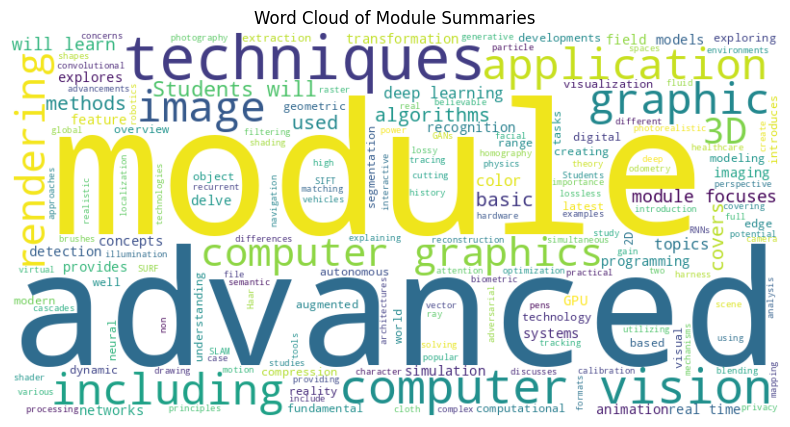

In [7]:
text_data = ' '.join(df_module['summary'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Module Summaries')
plt.show()

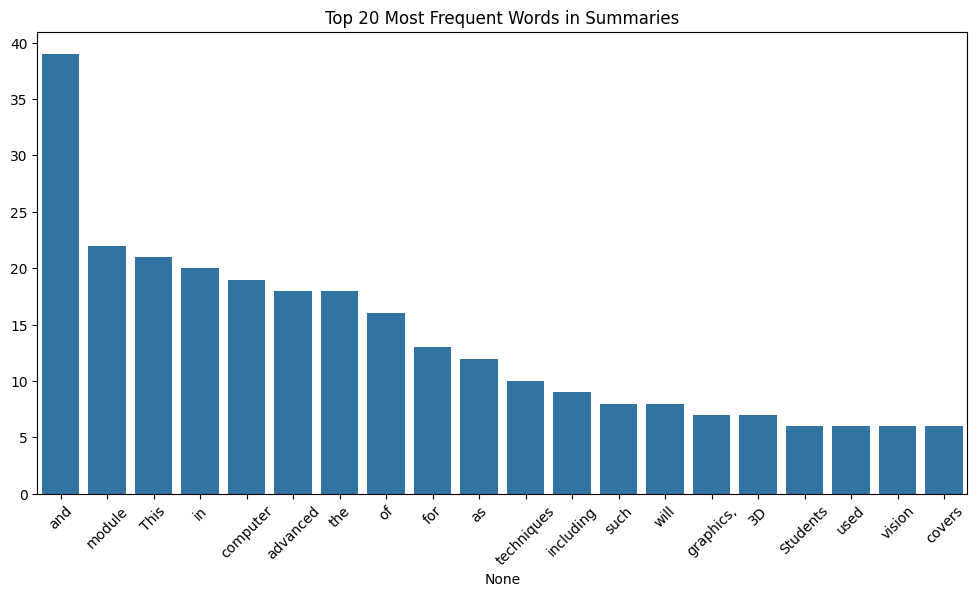

In [8]:
# Tokenize and count words
words = ' '.join(df_module['summary']).split()
word_freq = pd.Series(words).value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=word_freq.head(20).index, y=word_freq.head(20).values)
plt.title('Top 20 Most Frequent Words in Summaries')
plt.xticks(rotation=45)
plt.show()

In [9]:
# nltk.download('stopwords')
# nltk.download('punkt')

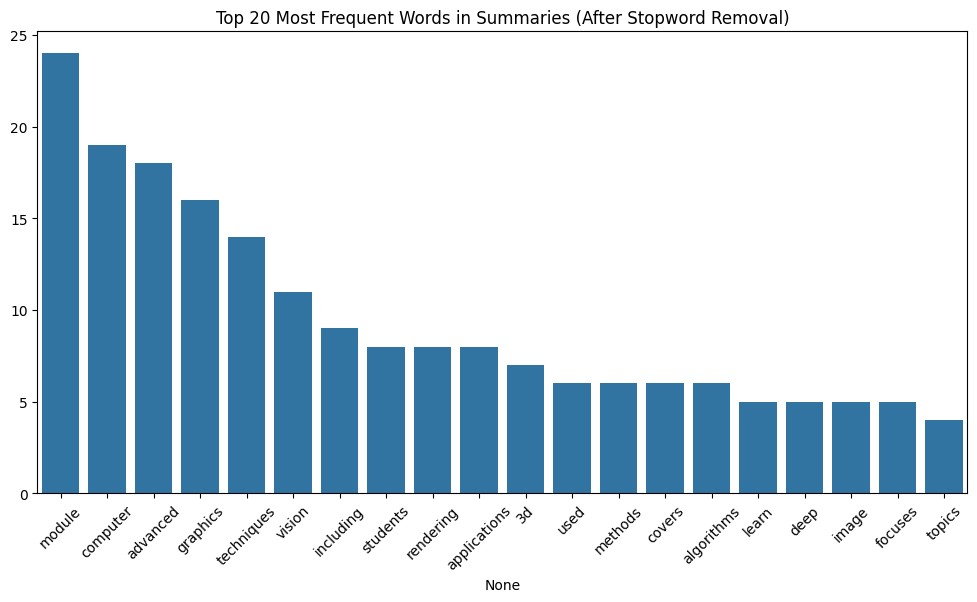

In [10]:
# Tokenize and remove stop words
stop_words = set(stopwords.words('english'))
words = ' '.join(df_module['summary']).lower()  # Convert to lowercase for case-insensitive removal
word_tokens = word_tokenize(words)
filtered_words = [word for word in word_tokens if word.isalnum() and word not in stop_words]

# Count word frequencies
word_freq = pd.Series(filtered_words).value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=word_freq.head(20).index, y=word_freq.head(20).values)
plt.title('Top 20 Most Frequent Words in Summaries (After Stopword Removal)')
plt.xticks(rotation=45)
plt.show()

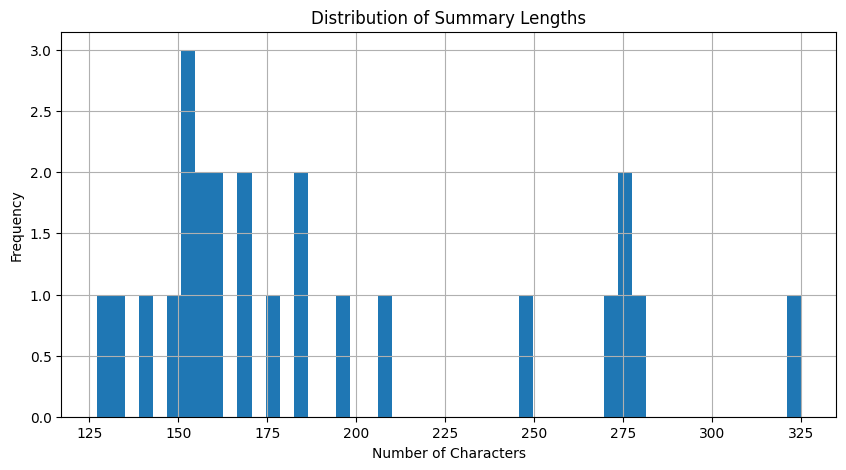

In [11]:
# Plot histogram of summary lengths
plt.figure(figsize=(10, 5))
df_module['summary'].apply(len).hist(bins=50)
plt.title('Distribution of Summary Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Recommendations of Modules Based on Summary

#### Vectorization of summarites using roberta(pretrained model)

In [13]:
"""
'all-distilroberta-v1': All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.
 It maps sentences & paragraphs to a 768 dimensional dense vector space and can be used for tasks like clustering or semantic search.
 https://huggingface.co/sentence-transformers/all-distilroberta-v1
"""

model = SentenceTransformer('all-distilroberta-v1')
vec_embed = model.encode(X, show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
vec_embed.shape

(24, 768)

#### Lower Dimensional representation of vector embedding

In [15]:
pca = PCA(n_components=10)
lower_embed = pca.fit_transform(vec_embed)

In [16]:
pca.explained_variance_ratio_.sum()

0.73999727

In [17]:
lower_embed.shape

(24, 10)

#### Similarity metrics: Cosine Similarity

In [18]:
cosine_sim_mat = cosine_similarity(lower_embed)

In [19]:
cosine_sim_data = pd.DataFrame(cosine_sim_mat)

In [20]:
cosine_sim_data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.000000,0.889774,0.240094,0.693604,0.349176,0.522690,0.089240,0.368161,0.097129,-0.185319,...,-0.424066,-0.358906,-0.088735,-0.460206,-0.641537,-0.598171,-0.313780,-0.402438,-0.355623,-0.370787
1,0.889774,1.000000,-0.014457,0.626484,0.528207,0.506893,-0.022423,0.255832,0.254242,-0.064166,...,-0.426185,-0.419231,-0.217640,-0.254249,-0.588765,-0.521481,-0.345056,-0.383633,-0.254328,-0.241044
2,0.240094,-0.014457,1.000000,-0.161134,0.118044,-0.048500,0.238427,-0.230176,-0.297659,0.084245,...,-0.156010,-0.115911,0.116349,-0.209172,-0.050568,-0.235671,-0.098034,-0.060403,-0.137455,-0.181907
3,0.693604,0.626484,-0.161134,1.000000,-0.014776,0.759976,0.138802,0.231297,0.498223,-0.241303,...,-0.272504,-0.302057,-0.005066,-0.494459,-0.493584,-0.402249,-0.007265,-0.256275,-0.420676,-0.261978
4,0.349176,0.528207,0.118044,-0.014776,1.000000,0.005162,-0.186569,-0.065984,-0.037047,-0.055158,...,0.031085,-0.231143,-0.369302,-0.307371,0.003809,-0.333872,-0.158981,-0.039275,-0.229098,-0.060053


In [21]:
def recommend(module_id):
    module_id -= 1
    similar_module_id = cosine_sim_data.loc[module_id].sort_values(ascending=False).index.tolist()[1:6]
    rec_module_ids = df_module['module_id'].loc[similar_module_id].values
    rec_module_names = df_module['module_name'].loc[similar_module_id].values
    sim_score = [cosine_sim_data[module_id][i] for i in similar_module_id]
    
    module_name_given = df_module['module_name'].loc[module_id]
    
    print(f"Module id provided: {module_id+1}, Module Name: {module_name_given}")
    print("-"*40)
    for i in range(len(similar_module_id)):
        print(f"Recommendation {i+1}:")
        print(f"Module id: {rec_module_ids[i]}\nModule Name: {rec_module_names[i]}\nSimilarity Score: {sim_score[i]}")
        print("-"*40)

In [22]:
recommend(24)

Module id provided: 24, Module Name: Module 6: Advanced Deep Learning Architectures for Computer Vision
----------------------------------------
Recommendation 1:
Module id: 20
Module Name: Module 2: Object Detection and Tracking
Similarity Score: 0.7600175142288208
----------------------------------------
Recommendation 2:
Module id: 19
Module Name: Module 1: Advanced Image Recognition Algorithms
Similarity Score: 0.6611724495887756
----------------------------------------
Recommendation 3:
Module id: 16
Module Name: Module 4 - Object Detection and Recognition
Similarity Score: 0.5417968034744263
----------------------------------------
Recommendation 4:
Module id: 23
Module Name: Module 5: Visual SLAM and Visual Odometry
Similarity Score: 0.14364033937454224
----------------------------------------
Recommendation 5:
Module id: 22
Module Name: Module 4: Advanced Facial Recognition and Biometrics
Similarity Score: 0.07101865857839584
----------------------------------------


In [25]:
df_query = pd.read_csv('queries.csv')

In [26]:
df_query.head()

,query_id,user_id,topic_id,date_search,lang
0,1,1,5,08/07/2020 15:44,en
1,2,1,6,26/03/2020 18:38,en
2,3,1,4,18/05/2023 03:26,en
3,4,2,7,16/11/2020 08:01,en
4,5,3,7,26/06/2021 13:02,en


In [28]:
df_query['date_search'] = pd.to_datetime(df_query['date_search'], format='%d/%m/%Y %H:%M')

In [38]:
most_queried_topics = df_query['topic_id'].value_counts().index[:5]

In [39]:
most_queried_topics

Index([4, 7, 2, 6, 1], dtype='int64', name='topic_id')

In [40]:
top_topics_df = df_query[df_query['topic_id'].isin(most_queried_topics)]